# Problem Statement and Business Case

Predict the likelihood of a bank customer taking a personal loan based on the customer's features such as age, education, work experience, income, location, family, and credit history.

# Import Libraries and Load the Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the dataset
bank_df = pd.read_csv('UniversalBank.csv')

In [3]:
# Visualize the dataset - the first 10 rows in the dataframe
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
# Visualize the dataset - the last 10 rows in the dataframe
bank_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [5]:
# The number of samples in the Universal Bank Dataset
bank_df.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

# Exploratory Data Analysis

In [6]:
# Obtain the dataframe info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Obtain the statistical summary of the dataframe
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# For better visualization
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
# Examine how many null values exist in the dataframe
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# The average age of customers in the dataset
bank_df['Age'].mean()

45.3384

In [11]:
# What is the % of customers who have credit cards?
creditcard_customers = bank_df[bank_df['CreditCard'] == 1]
creditcard_customers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
15,16,60,30,22,95054,1,1.5,3,0,0,0,0,1,1
19,20,55,28,21,94720,1,0.5,2,0,0,1,0,0,1
24,25,36,11,152,95521,2,3.9,1,159,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,4985,27,1,98,94043,4,2.3,3,0,0,0,0,0,1
4988,4989,34,8,85,95134,1,2.5,1,136,0,0,0,0,1
4990,4991,55,25,58,95023,4,2.0,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.9,2,100,0,0,0,0,1


In [12]:
len(creditcard_customers)

1470

In [13]:
cc_customers_percent = len(creditcard_customers) / len(bank_df) * 100
print('The percentage of customers who have credit cards with the Universal Bank = ', cc_customers_percent, '%')

The percentage of customers who have credit cards with the Universal Bank =  29.4 %


In [14]:
# The customers who accepted a personal loan with the Universal Bank
accepted_customers = bank_df[bank_df['Personal Loan'] == 1]
accepted_customers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [15]:
len(accepted_customers)

480

In [16]:
accepted_customers_percent = len(accepted_customers) / len(bank_df) * 100
print('The percentage of customers who accepted a personal loan = ', accepted_customers_percent, '%')

The percentage of customers who accepted a personal loan =  9.6 %


# Perform Data Visualization

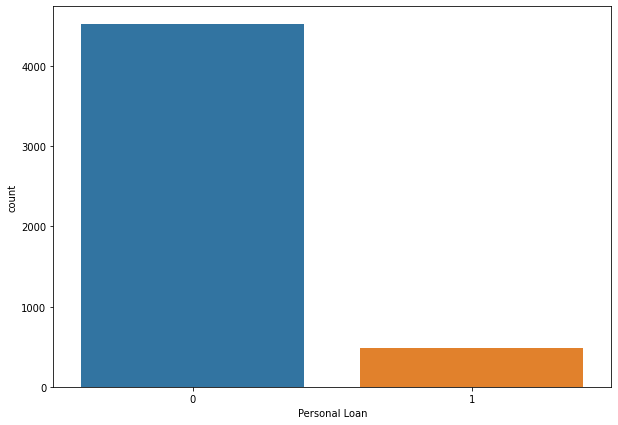

In [17]:
# Visualize the Personal Loan column 
# The percentage of customers who accepted personal loan ~ 9%
plt.figure(figsize = (10, 7))
sns.countplot(bank_df['Personal Loan'])

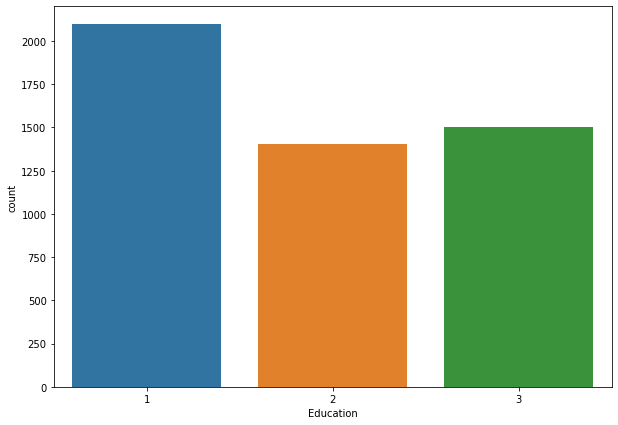

In [18]:
# Visualize the Education feature
plt.figure(figsize = (10, 7))
sns.countplot(bank_df['Education'])

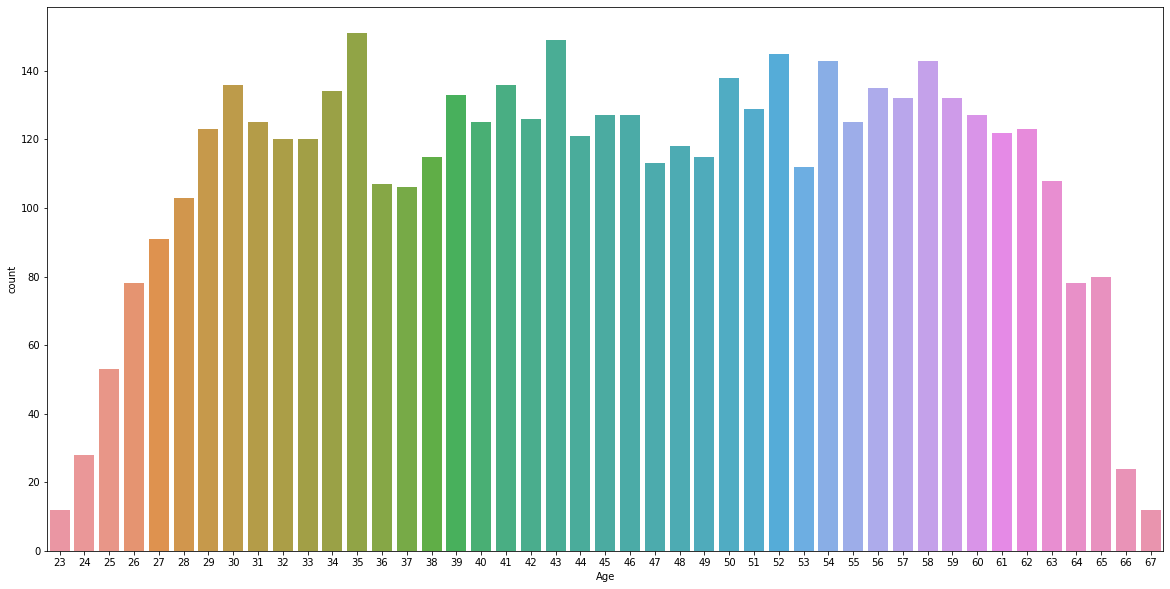

In [19]:
# Visualize the Age
# Uniform distribution between 30-60 years
plt.figure(figsize = (20, 10))
sns.countplot(bank_df['Age'])

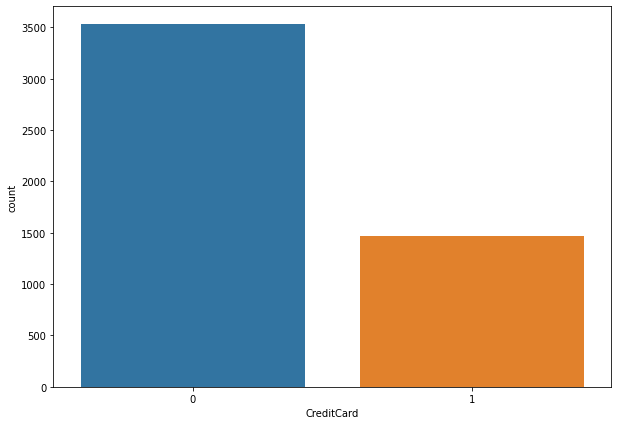

In [20]:
# Visualize the Credit Card availability feature
# ~29% of customers have credit cards
plt.figure(figsize = (10, 7))
sns.countplot(bank_df['CreditCard'])

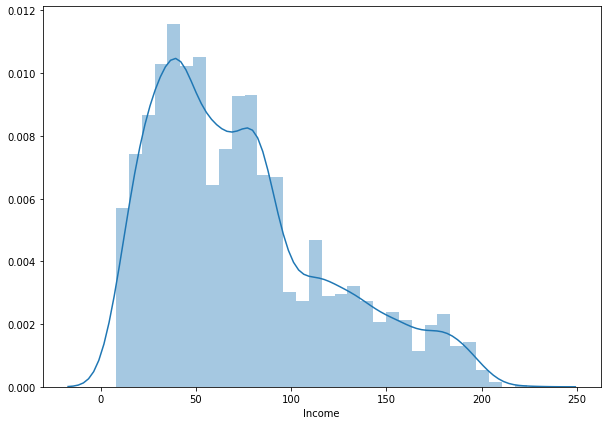

In [21]:
# Visualize the income data - the distribution of the income
# Most customers have income that ranges between 45K and 60K per year
# The data is skewed with less customers earning above 100K
plt.figure(figsize = (10, 7))
sns.distplot(bank_df['Income'])

In [22]:
# Create two dataframes for the two classes
personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [23]:
personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [24]:
# The mean income of the customers who have personal loans is generally high ~144K and average CC of 3.9K
personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [25]:
no_personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [26]:
# The mean income of the customers who do not have personal loans is generally low ~66K and average CC of 1.7K
no_personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


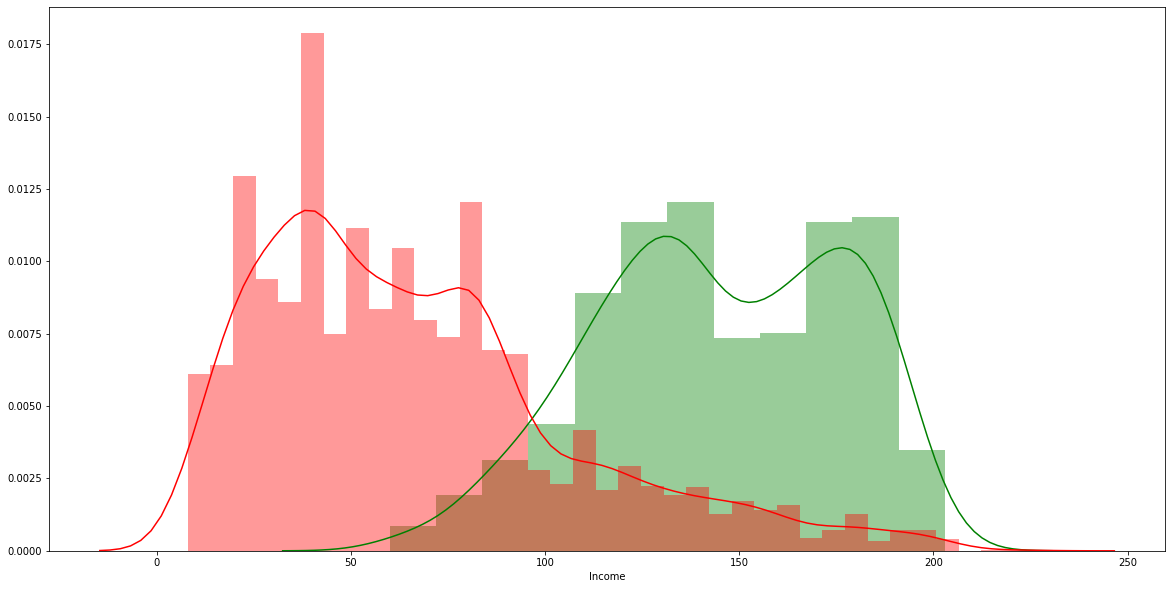

In [27]:
# Plot the distribution plot for both classes separately 
# Customers who took personal loans tend to have higher income
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['Income'], color = 'g')
sns.distplot(no_personalloans['Income'], color = 'r')

In [ ]:
# Plot pairplot
plt.figure(figsize = (30, 30))
sns.pairplot(bank_df)

In [ ]:
# Correlation plot
# Strong positive correlation between the Experience and Age
# Strong positive correlation between CC average and Income
plt.figure(figsize = (20, 20))
correlation_matrix = bank_df.corr()
sns.heatmap(correlation_matrix, annot = True)

There is a direct positive correlation between the level of experience (or the expertise) of the customers and their age. As people grow older, the number of years of experience increases. 

There is also a positive correlation of ~0.65 between the average credit card spending and income. It appears that people who have higher income tend to use the credit card much more, and they also have a higher average on their credit card.

In [ ]:
# Plot the distribution plot of the average credit card spending
plt.figure(figsize = (20, 10))
sns.distplot(bank_df['CCAvg'])

In [ ]:
# Plot the distribution of the average credit spending for each of the classes (personal loans = Yes and personal loans = No)
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['CCAvg'], color = 'g')
sns.distplot(no_personalloans['CCAvg'], color = 'r')

The results are very consistent with the information obtained earlier. The data indicates that the group which accepted a personal loan offer (the green group) tends to have higher average credit card spending compared with the other group which did not accept the bank personal loan offer (the red group). The group which declined the personal loan offer also tends to have lower credit card spending on average.

# Prepare the Data Before Training the Model

In [ ]:
# List the names of all columns
bank_df.columns

In [ ]:
# Specify the model input features (all the data except for the Personal Loan, which is the target variable)
X = bank_df.drop(columns = ['Personal Loan'])
X

In [ ]:
# Model output (the target variable)
y = bank_df['Personal Loan']
y

In [ ]:
y = to_categorical(y)
y

In [ ]:
# Scale the data before training the model
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [ ]:
# Split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
# Print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Build a Multi-Layer Neural Network Model

In [ ]:
# Create the Keras sequential model
ANN_model = keras.Sequential()

# Add the dense layers
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
ANN_model.add(Dropout(0.3))

ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.3))

ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.3))

ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.4))

ANN_model.add(Dense(250, activation = 'linear'))
ANN_model.add(Dropout(0.4))

# Add the output layer - a dense layer with the Softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

# Compile and Train the Deep Learning Model

In [ ]:
# Compile the model
ANN_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Train the model
history = ANN_model.fit(X_train, y_train, epochs = 20, validation_split = 0.2, verbose = 1)

In [ ]:
# Plot the model performance across the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# Assess the Performance of the Trained Model

In [ ]:
# Make predictions
predictions = ANN_model.predict(X_test)

# Append the index of the max value using the argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [ ]:
# Get the acccuracy of the model
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

In [ ]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

In [ ]:
# Plot the Confusion Matrix
cf_matrix = metrics.confusion_matrix(y_original, predict)
sns.heatmap(cf_matrix, annot = True)

In [ ]:
# Print the classification report
report = classification_report(y_original, predict, output_dict=True)
df = pd.DataFrame(report).transpose()
df